# Data Description

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

# Exploratory Data Analysis

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Read in the csv file
df = pd.read_csv('heart.csv')

In [3]:
# Checking first five rows of the dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Checking basic overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# Checking summary of the columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
# Checking the shape of the dataset
df.shape

(303, 14)

In [7]:
# Checking if there are null values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
# Seperating columns
num_cols = ['age','trtbps','chol','thalachh','oldpeak']
cat_cols = ['sex','cp','fbs','restecg','exng','caa','thall','slp']

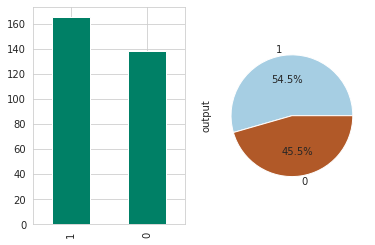

In [9]:
fig,ax = plt.subplots(1,2)
df['output'].value_counts().plot(kind='bar',cmap='summer',ax=ax[0])
df['output'].value_counts().plot(kind='pie',autopct='%.1f%%',cmap='Paired',ax=ax[1])

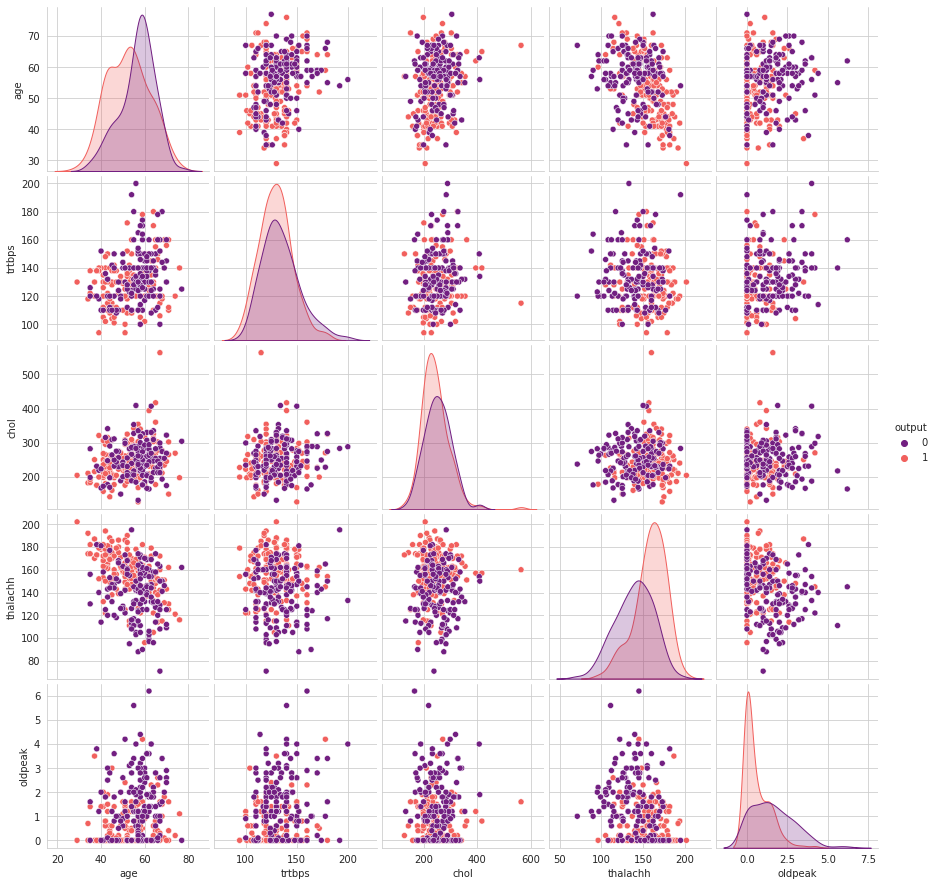

In [10]:
sns.pairplot(df.drop(cat_cols,axis=1),hue='output',palette='magma')

Text(0.5, 0, 'Age')

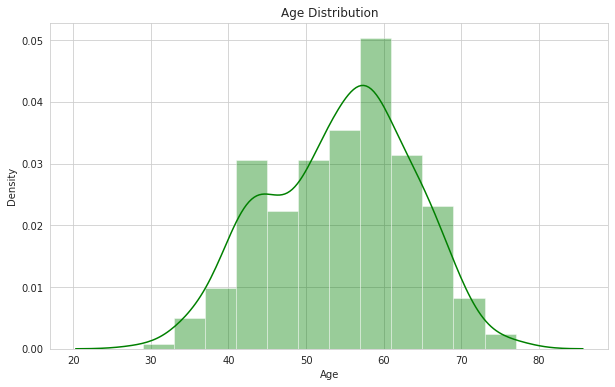

In [11]:
plt.figure(figsize=(10,6))
sns.distplot(df['age'],color='green')
plt.title('Age Distribution')
plt.xlabel('Age')

Text(0.5, 0, 'Cholestrol')

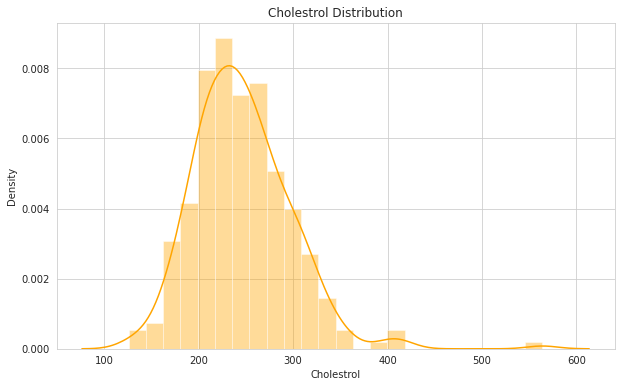

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(df['chol'],color='orange')
plt.title('Cholestrol Distribution')
plt.xlabel('Cholestrol')

Text(0, 0.5, 'Count')

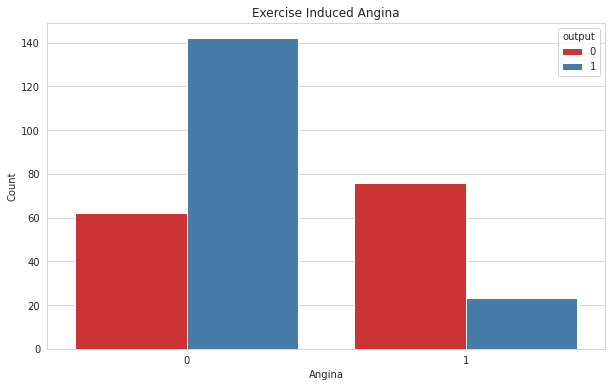

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(x='exng',data=df,hue='output',palette='Set1')
plt.title('Exercise Induced Angina')
plt.xlabel('Angina')
plt.ylabel('Count')

Text(0.5, 1.0, 'Heatmap of Correlation')

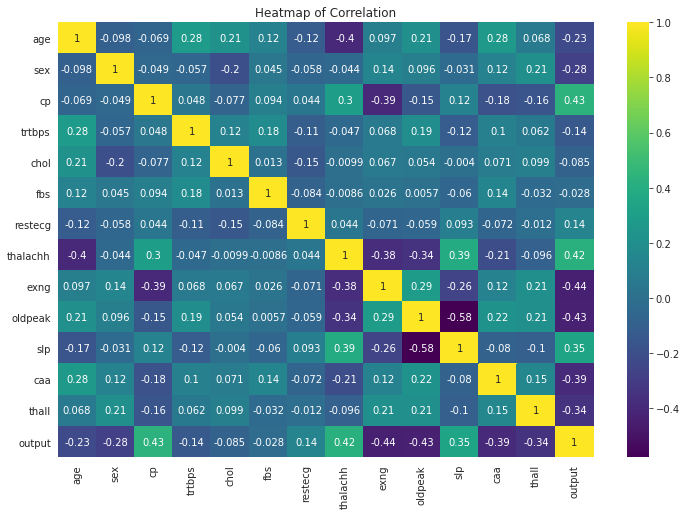

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of Correlation')

Text(0.5, 0, 'Chest Pain Type')

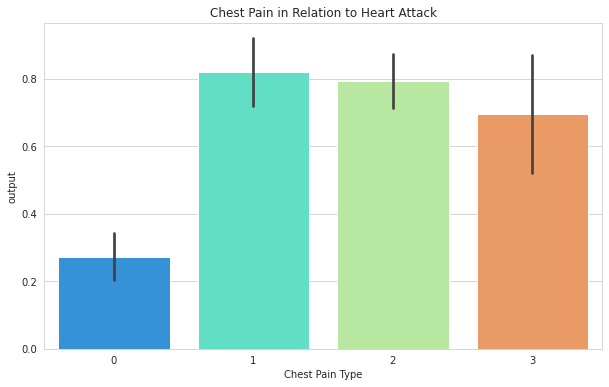

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x='cp',y='output',data=df,palette='rainbow')
plt.title('Chest Pain in Relation to Heart Attack')
plt.xlabel('Chest Pain Type')

# Machine Learning Model

In [16]:
scaler = StandardScaler()
scaler.fit(df.drop('output',axis=1))
scaled_features = scaler.fit_transform(df.drop('output',axis=1))
df_feat = pd.DataFrame(scaled_features)

X = df_feat
y = df['output'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=193)

In [17]:
lg = LogisticRegression()
lg.fit(X_train,y_train)
predictions = lg.predict(X_test)

print("Accuary of Logistic Regression: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
print("Confusion Matrix of Logistic Regression:")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of Logistic Regression:")
print(classification_report(y_test,predictions))

acc_lg = round(accuracy_score(y_test, predictions) * 100, 2)

Accuary of Logistic Regression: 88.1578947368421


Confusion Matrix of Logistic Regression:
[[26  6]
 [ 3 41]]


Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.87      0.93      0.90        44

    accuracy                           0.88        76
   macro avg       0.88      0.87      0.88        76
weighted avg       0.88      0.88      0.88        76



In [18]:
svc = SVC()
svc.fit(X_train,y_train)
predictions = svc.predict(X_test)

print("Accuary of Support Vector Machine: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
print("Confusion Matrix of Support Vector Machine:")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of Support Vector Machine:")
print(classification_report(y_test,predictions))

acc_svc = round(accuracy_score(y_test, predictions) * 100, 2)

Accuary of Support Vector Machine: 90.78947368421053


Confusion Matrix of Support Vector Machine:
[[26  6]
 [ 1 43]]


Classification Report of Support Vector Machine:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        32
           1       0.88      0.98      0.92        44

    accuracy                           0.91        76
   macro avg       0.92      0.89      0.90        76
weighted avg       0.91      0.91      0.91        76



In [19]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)

print("Accuary of Random Forest: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
print("Confusion Matrix of Random Forest:")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of Random Forest:")
print(classification_report(y_test,predictions))

acc_rf = round(accuracy_score(y_test, predictions) * 100, 2)

Accuary of Random Forest: 89.47368421052632


Confusion Matrix of Random Forest:
[[26  6]
 [ 2 42]]


Classification Report of Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.88      0.95      0.91        44

    accuracy                           0.89        76
   macro avg       0.90      0.88      0.89        76
weighted avg       0.90      0.89      0.89        76



In [20]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print("Accuary of K Nearest Neighbors: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of K Nearest Neighbors:")
print(classification_report(y_test,predictions))

acc_knn = round(accuracy_score(y_test, predictions) * 100, 2)

Accuary of K Nearest Neighbors: 84.21052631578947


[[22 10]
 [ 2 42]]


Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        32
           1       0.81      0.95      0.88        44

    accuracy                           0.84        76
   macro avg       0.86      0.82      0.83        76
weighted avg       0.85      0.84      0.84        76



In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
predictions = dt.predict(X_test)

print("Accuary of Decision Tree: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
print("Confusion Matrix of Decision Tree:")
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt='.2f')
print("\n")
print("Classification Report of Decision Tree:")
print(classification_report(y_test,predictions))

acc_dt = round(accuracy_score(y_test, predictions) * 100, 2)

Accuary of Logistic Regression: 78.94736842105263


Confusion Matrix of Logistic Regression:
[[22 10]
 [ 6 38]]


Classification Report of Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.79      0.86      0.83        44

    accuracy                           0.79        76
   macro avg       0.79      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



In [22]:
model = Sequential()

# Input layer
model.add(Dense(80,  activation='relu'))

# Hidden layer
model.add(Dense(39, activation='relu'))

# Hidden layer
model.add(Dense(21, activation='relu'))

# Output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

early_stopping = EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)

model.fit(x=X_train, 
          y=y_train, 
          epochs=50,
          validation_data=(X_test, y_test),
          callbacks=[early_stopping]
          )

Epoch 1/50
8/8 [==============================] - 1s 38ms/step - loss: 0.6853 - val_loss: 0.6184
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.6221 - val_loss: 0.5606
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.5694 - val_loss: 0.5039
Epoch 4/50
8/8 [==============================] - 0s 7ms/step - loss: 0.5223 - val_loss: 0.4510
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 0.4777 - val_loss: 0.3978
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 0.4373 - val_loss: 0.3483
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 0.4085 - val_loss: 0.3115
Epoch 8/50
8/8 [==============================] - 0s 5ms/step - loss: 0.3843 - val_loss: 0.2870
Epoch 9/50
8/8 [==============================] - 0s 6ms/step - loss: 0.3700 - val_loss: 0.2802
Epoch 10/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3614 - val_loss: 0.2765
Epoch 11/50
8/8 [=====================

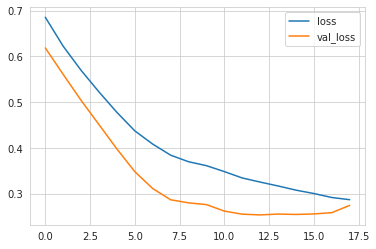

In [23]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [24]:
predictions = model.predict_classes(X_test)

print("Accuary of Artificial Nueral Networks: " + str(100 * accuracy_score(y_test,predictions)))
print("\n")
print("Confusion Matrix of Artificial Nueral Networks:")
print(confusion_matrix(y_test,predictions))
print("\n")
print("Classification Report of Artificial Nueral Networks:")
print(classification_report(y_test,predictions))

acc_ann = round(accuracy_score(y_test, predictions) * 100, 2)

Accuary of Artificial Nueral Networks: 92.10526315789474


Confusion Matrix of Artificial Nueral Networks:
[[27  5]
 [ 1 43]]


Classification Report of Artificial Nueral Networks:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       0.90      0.98      0.93        44

    accuracy                           0.92        76
   macro avg       0.93      0.91      0.92        76
weighted avg       0.92      0.92      0.92        76



# Model Comparisons

In [25]:
models = pd.DataFrame({
    'model': ['Logistic Regression', 'Support Vector Machine','Random Forest', 
              'KNN','Decision Tree','ANN'],
    'score': [acc_lg, acc_svc, acc_rf, 
              acc_knn, acc_dt, acc_ann]
})

models

,model,score
0,Logistic Regression,88.16
1,Support Vector Machine,90.79
2,Random Forest,89.47
3,KNN,84.21
4,Decision Tree,78.95
5,ANN,92.11


Text(0.5, 1.0, 'Model Comparisons')

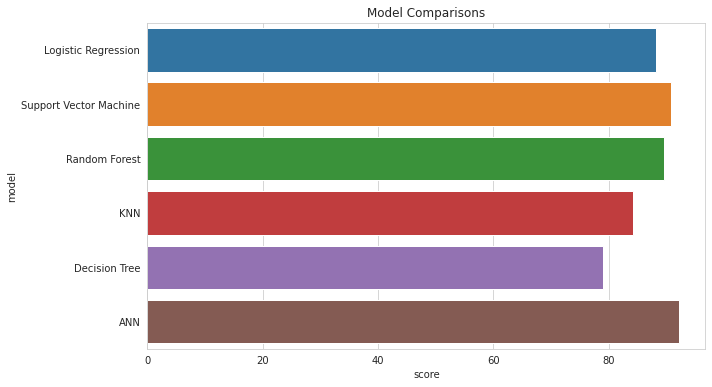

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='score', y='model', data=models)
plt.title('Model Comparisons')